In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from statsmodels.tsa.arima_model import ARIMA, ARMA, ARMAResults, ARIMAResults

In [5]:
from pmdarima import auto_arima

In [21]:
df1=pd.read_csv('DailyTotalFemaleBirths.csv', index_col='Date')
df1

,Births,Deaths
Date,,
01-01-59,35,32
02-01-59,32,39
03-01-59,30,27
04-01-59,31,22
05-01-59,44,34
...,...,...
27-12-59,37,27
28-12-59,52,34
29-12-59,48,40


In [22]:
df1.index.freq='D'
df1=df1[:120]#taking only 4 months so that we dont have seasonality

In [23]:
df2= pd.read_csv('TradeInventories.csv', index_col='Date', parse_dates=True)
df2.index.freq='MS'

# ARMA

In [24]:
#AEMA works well for stationary data

In [25]:
df1['Births', 'Deaths'].plot(figsize=(12,5))

KeyError: ('Births', 'Deaths')

In [26]:
#running dicky fuller test to confirm stationality

In [28]:
from statsmodels.tsa.stattools import adfuller

In [30]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression.
    
        * 'c' : constant only (default).
        * 'ct' : constant and trend.
        * 'ctt' : constant, and linear and quadratic trend.
        * 'nc' : no constant, no trend.
    
    autolag : {'AIC', 'BIC', 't-stat', None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if 'AIC' (default) or 

In [33]:
adfuller(df1['Births'])

(-9.855384093160586,
 4.3735454059910584e-17,
 0,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 723.9921310744033)

In [23]:
#p is less than 0.05. So, the data is stationary

In [34]:
#To find orders
auto_arima(df1['Births', 'Deaths'], seasonal=False).summary()

KeyError: ('Births', 'Deaths')

In [ ]:
#in tutorial it says ARMA(2,2). Lets proceed with that

In [34]:
train=df1.iloc[:90]
test=df1.iloc[90:]

In [37]:
ARMA_df1=ARMA(train['Births'], order=(2,2)).fit()

In [38]:
ARMA_df1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Sat, 09 May 2020   AIC                            627.809
Time:                        23:43:48   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [39]:
start=len(train)
end=len(train)+len(test)-1

In [40]:
pred_df1_arma=ARMA_df1.predict(start, end)

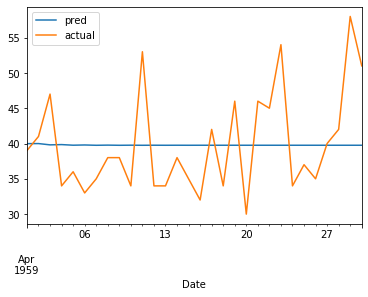

In [44]:
pred_df1_arma.plot(legend=True, label='pred')
test['Births'].plot(legend=True, label='actual')

In [45]:
#its normal since its ARMA. menas for both are same around 40

# ARIMA

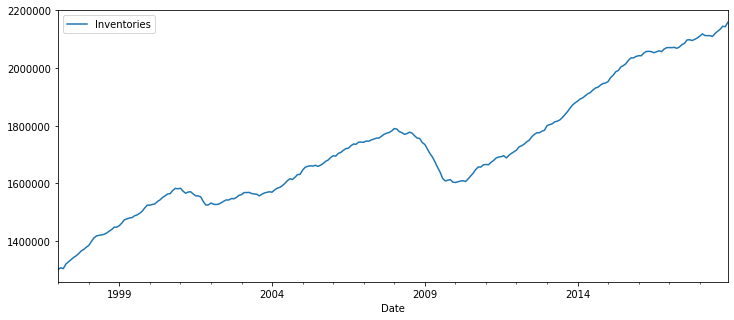

In [46]:
df2.plot(figsize=(12,5))

In [47]:
#ETS

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [53]:
res= seasonal_decompose(df2['Inventories'], model='add')

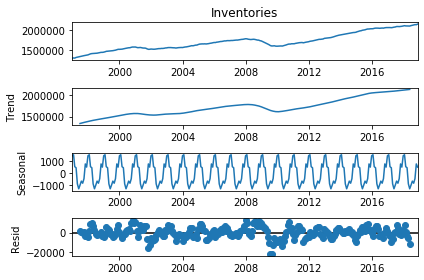

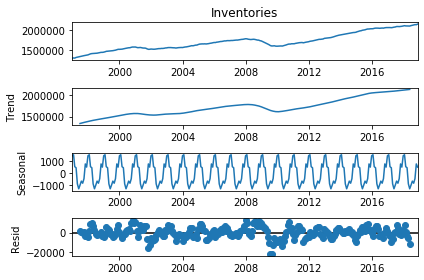

In [54]:
res.plot()

In [55]:
#there is seasonality. We should be using SARIMA. But for now, were continuing with ARIMA

In [59]:
auto_arima_df2= auto_arima(df2['Inventories'], seasonal=False, trace=True, m=12)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=5373.961, BIC=5395.394, Time=0.447 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=5348.037, BIC=5355.181, Time=0.010 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=5399.843, BIC=5410.560, Time=0.033 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=5350.241, BIC=5360.957, Time=0.043 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=5409.217, BIC=5412.789, Time=0.007 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=5378.835, BIC=5393.124, Time=0.128 seconds
Total fit time: 0.671 seconds


In [60]:
auto_arima_df2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sun, 10 May 2020   AIC                           5348.037
Time:                        00:00:22   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
train1=df2.iloc[:252]
test1= df2.iloc[252:]

In [65]:
start1=len(train1)
end1=len(train1)+len(test1)-1
res2=ARIMA(train1['Inventories'], order=(1,1,1)).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.394
Method:                       css-mle   S.D. of innovations           4845.008
Date:                Sun, 10 May 2020   AIC                           4980.788
Time:                        00:08:30   BIC                           4994.890
Sample:                    02-01-1997   HQIC                          4986.463
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3233.7679   1344.917      2.404      0.016     597.779    5869.757
ar.L1.D.Inventories     0.9026      0.039     23.012      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

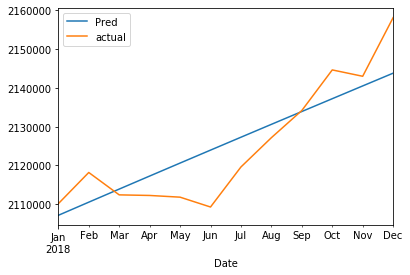

In [68]:
pred2=res2.predict(start=start1, end=end1, typ='levels')
pred2.plot(legend=True, label='Pred')
test1['Inventories'].plot(legend=True, label='actual')

In [69]:
#Evaluation

In [70]:
from statsmodels.tools.eval_measures import rmse

In [71]:
error=rmse(test1['Inventories'], pred2)

In [72]:
error

7767.490043111326

In [78]:
test1['Inventories'].mean()

2125075.6666666665

In [79]:
pred2.mean()

2125569.1105313525

In [76]:
test1['Inventories'].describe()

count    1.200000e+01
mean     2.125076e+06
std      1.632190e+04
min      2.109298e+06
25%      2.112166e+06
50%      2.118908e+06
75%      2.136379e+06
max      2.158115e+06
Name: Inventories, dtype: float64

# Forecast into Unknown future

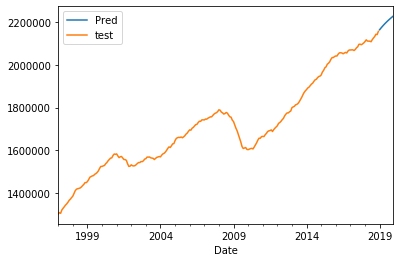

In [81]:
model=ARIMA(df2['Inventories'], order=(1,1,1)).fit()
pred_model=model.predict(start=len(df2), end=len(df2)+11, typ='levels')
pred_model.plot(legend=True, label='Pred')
df2['Inventories'].plot(legend=True, label='test')